# ISEN 613 Final Project - Data Analysis and Modelling of Strength of high-performance Concrete

**Submitted by:**
- Ravi Sai Subhakar Vadlamani - 535006189
- Sai Krishna Reddy Koppula   - 634003916
- Karishma Bokam              - 434009073

# INTRODUCTION

Concrete is among the most widely used materials in construction due to its strength, and durability. However, achieving the desired compressive strength in concrete requires carefully balancing its components. These components typically include cement, supplementary materials such as slag and fly ash, water, aggregates, and other chemical additives. Each element contributes uniquely to the properties of the resulting concrete.

In this study, we aim to investigate the relationships between these variables and the compressive strength of concrete. Our analysis will focus on identifying patterns and insights that can improve the design and preparation of concrete mixtures for better strength. By reviewing factors such as material type, quantity, their proportions, and the age of the concrete, we plan to understand how these variables influence strength development of concrete over time.

Our research will be a combination of statistical methods and machine learning techniques to explore the complex interactions between variables. By doing so, we aim to identify not only the individual roles of each component but also the combinations that yield the highest strength outcomes. The findings from this study are expected to provide valuable guidance for designing concrete mixtures that are both efficient and effective, offering insights that could benefit professionals in the construction industry.

The dataset we are going to use for this study contains 8 input variables and 1 output variable that are described below.

**Input Variables:**
*   **Cement:** Measured in kg per cubic meter of the mixture.
*   **Blast Furnace Slag:** Measured in kg per cubic meter of the mixture.
*   **Fly Ash:** Measured in kg per cubic meter of the mixture.
*   **Water:** Measured in kg per cubic meter of the mixture.
*   **Superplasticizer:** Measured in kg per cubic meter of the mixture.
*   **Coarse Aggregate:** Measured in kg per cubic meter of the mixture.
*   **Fine Aggregate:** Measured in kg per cubic meter of the mixture.
*   **Age:** The curing time of the concrete in days (ranging from 1 to 365).

**Output Variables:**
*   **Concrete Compressive Strength:** Measured in megapascals (MPa), representing the concrete's resistance to compression

  

Let us first import a set of Python libraries that we are going to use to perform data analysis, visualization, and machine learning modeling. We are going to use the following libraries in our analysis.

*   **Pandas:** Useful for data manipulation and analysis
*   **NumPy:** Supports numerical operations on large datasets
*   **Matplotlib and Seaborn:** Tools to create insightful vizualizations
*   **Statsmodels:** Facilitates statistical modeling and inference.
*   **Scikit-learn (sklearn):** Supports a wide range of machine learning algorithms and techniques



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from ISLP.models import ModelSpec as MS
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

Now that we have imported all the required libraries, let us go ahead and load our dataset. We have downloaded the dataset from kaggle and is available in the file 'concrete.csv'.

# Initial Data Analysis

In [8]:
# Reading the data from file to a data frame
concrete_data = pd.read_csv('concrete.csv')

Now let us review the basic data characteristics of the datasets.

In [10]:
concrete_data.shape

(1030, 9)

In [11]:
concrete_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [12]:
concrete_data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [13]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [14]:
concrete_data.isnull()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [15]:
concrete_data.isna()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


### We can summarize the basic characteristics of data as follows:

* **Number of Observations:** 1030
* **Total Number of Attributes:** 9 (8 input variables and 1 output variable)
* **Missing Values:** None
* **Data Type:** Quantitative - all variables are numerical (this includes the age variable which could also be considered categorial based on the analysis type)

In [17]:
#Deep dive into summary statistics: Mean, variance, and range and other statistics of the dataset
Summary_Analysis = concrete_data.describe().T
Summary_Analysis['variance'] = concrete_data.var()
Summary_Analysis['range'] = Summary_Analysis['max'] - Summary_Analysis['min']
print(Summary_Analysis)

               count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max      variance   range  
cement         350.000   540.0  10921.580220  438.00  
slag           142.950   359.4   7444.124812  359.40  
ash            118.300   200.1   4095.616541  200.10  
water          192.000   247.0    456.0

### Understanding the Statistical Summary:

To understand more about the dataset, we took a deep dive into the statistics as we can see above. Let us now understand what these statistics tell us about the data.

* Variables have varied ranges, with some (like cement and slag) spanning large values and others (like superplastic and water) showing smaller ranges.
* Cement appears to be the most significant component by mean (281.17) and range (438). This indicates that i could be primary indicator of strength.
* Variables like Cement, Slag, coarseagg, fineagg, and Ash, have higher standard deviations which means they show significant variability.
* Water is having low variance which indictaes that it is being consistently used across all mixtures.
* Strength, although it is not displaying as much variation as some other variables, is still showing a notable degree of variability, indicating how different compositions contribute to varying levels of compressive strength.
* We can also understand that some variables(Ex: Superplasticizer) are skewed. However, understanding the skewness would be easy if we viewed the data visually(histograms). So, let's get right into it.


# Univariate Analysis
 In this step, we are going to analyse and undertand one variable at at time. Our goal in this steo is to Understand the distribution, central tendency, and spread of a single variable. A basic step of univariate analyssis is to plot histograms of each variable.


<Figure size 1500x800 with 0 Axes>

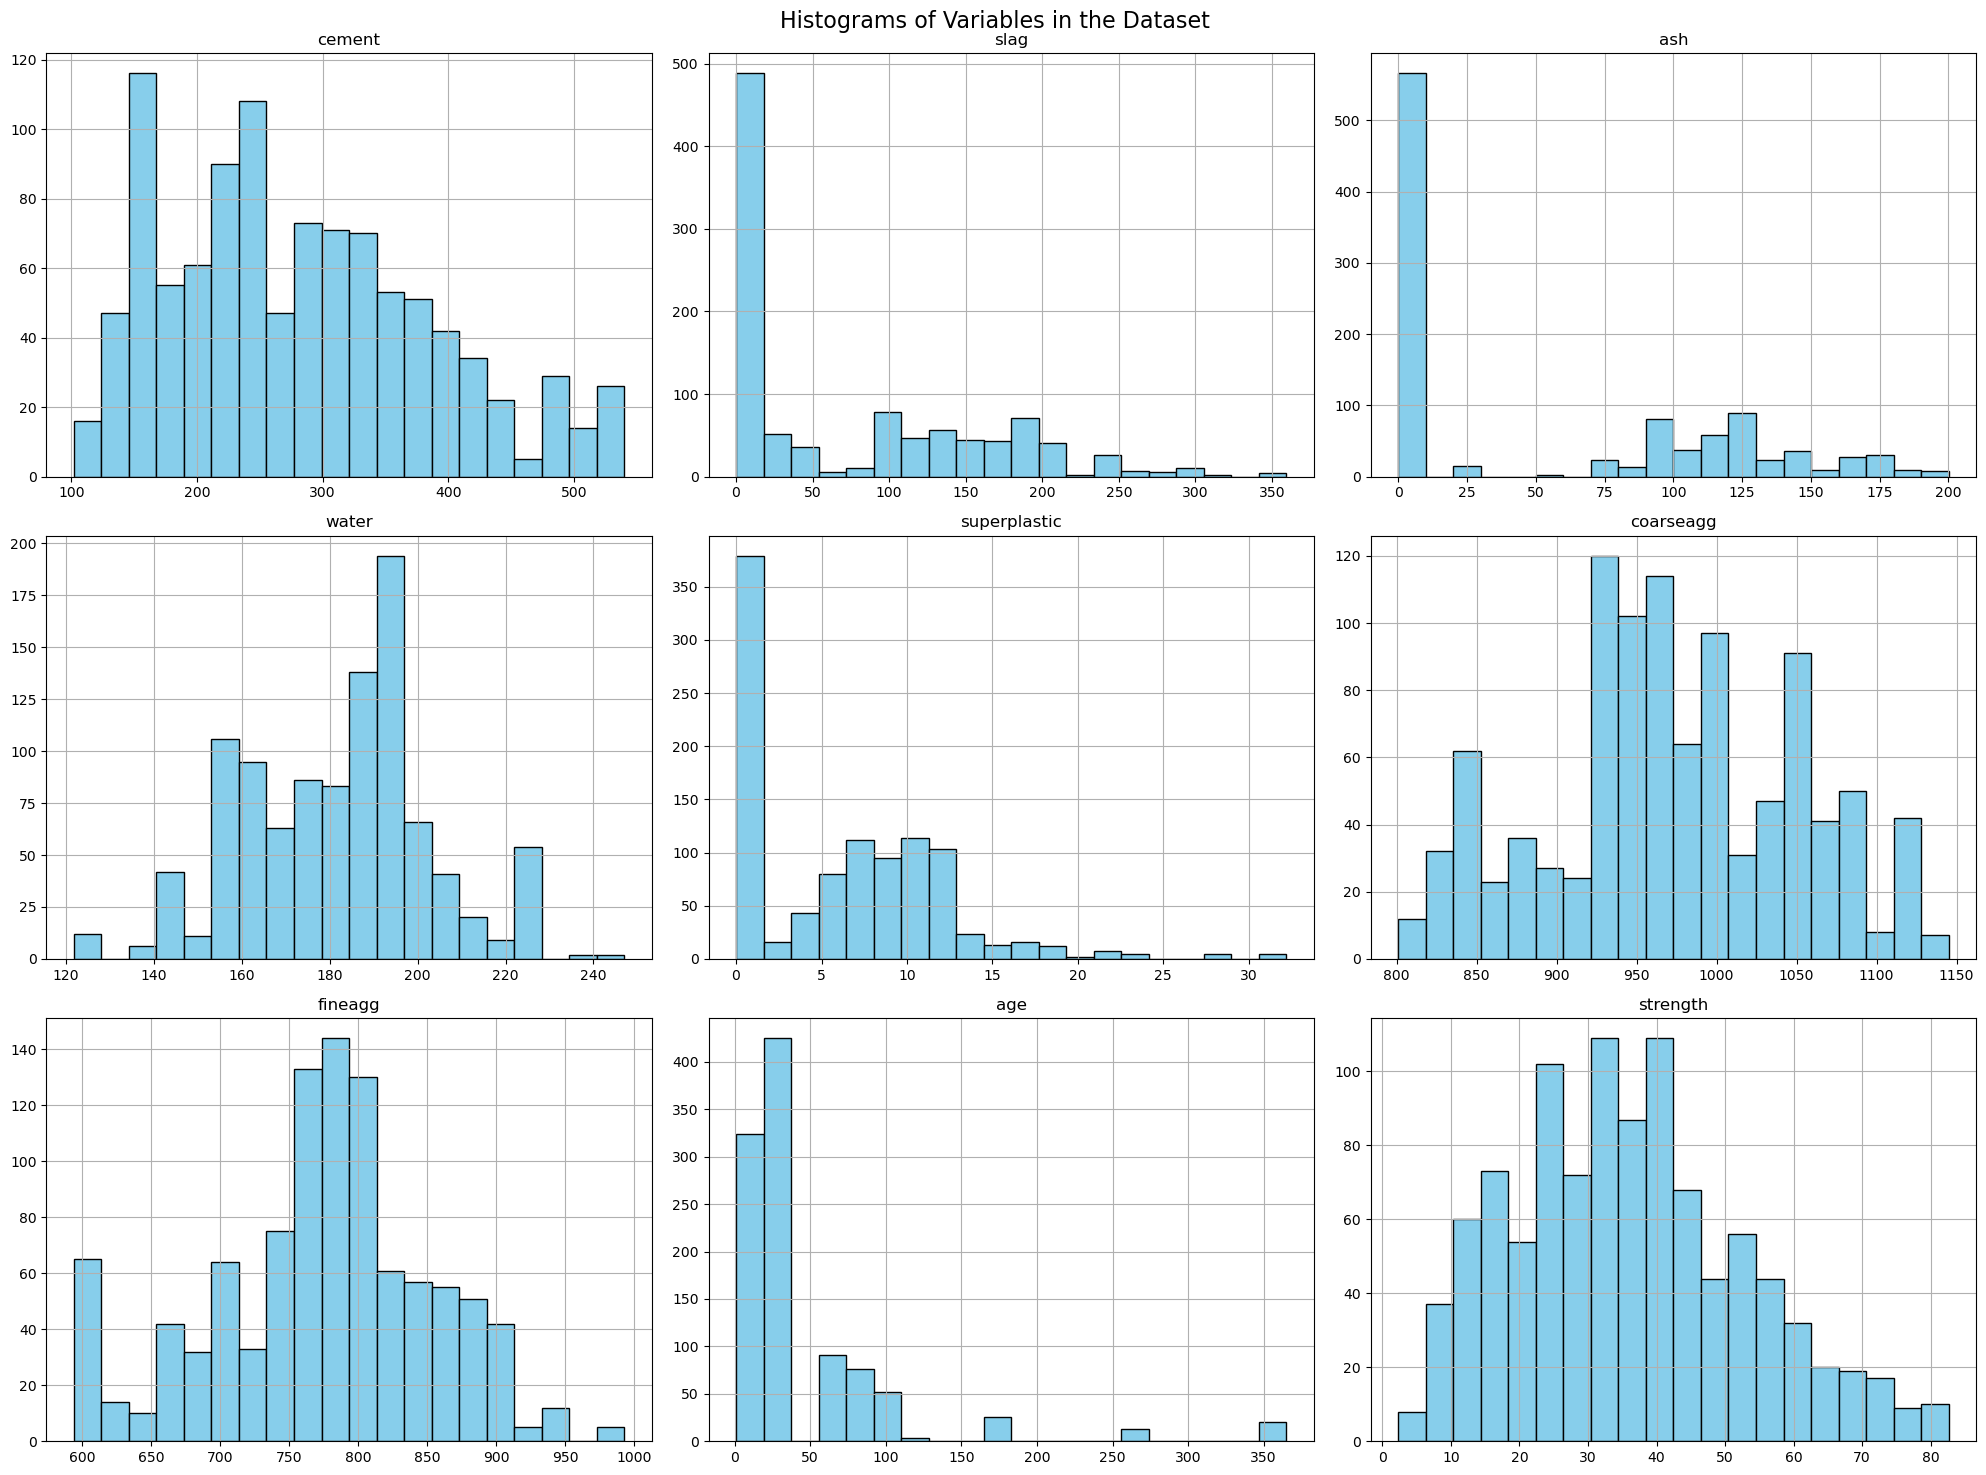

In [20]:
# Histograms
plt.figure(figsize=(15, 8))
concrete_data.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Variables in the Dataset', fontsize=16)
plt.tight_layout()
plt.show()

### Observations:

* The distribution of cement is almost symmetrical, with a peak at medium values. There is a noticeable spread, indicating a wide variety of cement usage across the dataset.
* The distribution of slag and Ash are heavily skewed towards zero, which means that many samples do not include slag or Ash or use them in small quantities.
* The water content distribution is also relatively symmetrical and concentrated around a central value. This means that water proportions are standard across the dataset, with limited variability.
* The distribution of curing age is highly skewed, which means most of the samples are from early curing times.


### Box Plots
Another form of Univariate analysis is box plots which will help us identify any outliers in each variable.

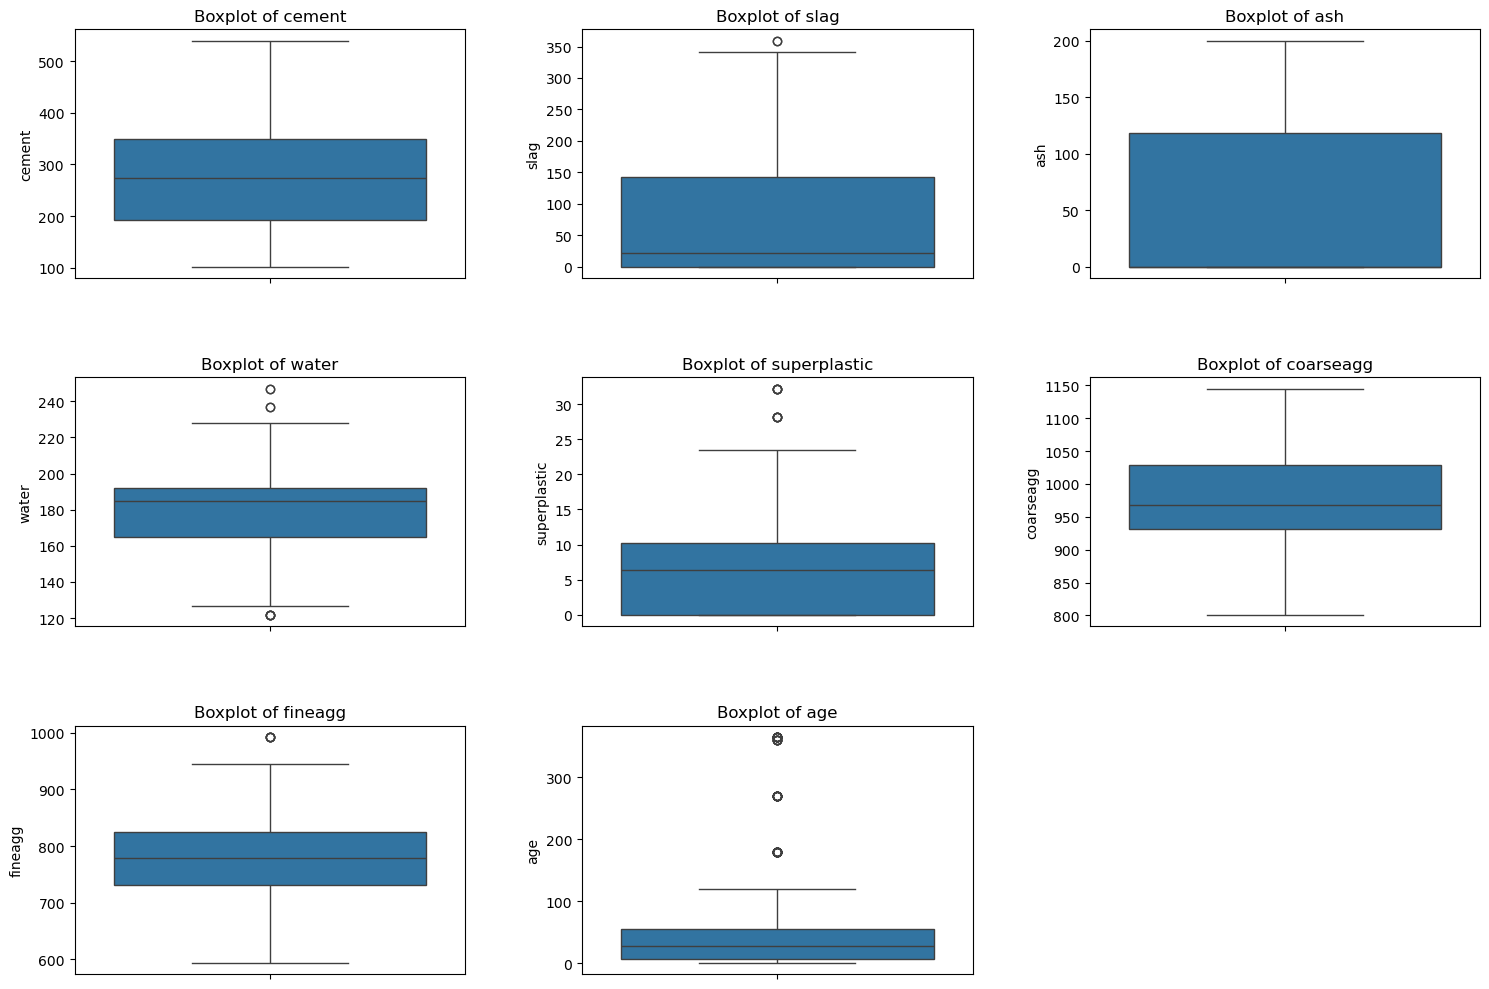

In [23]:
# Represention of Box plot to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(concrete_data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(concrete_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

## Observations:
* We can see that the majority of variables are used consistently across most samples. However, A few variables, such as water and fine aggregate, show moderate variability, while others, like coarse aggregate, remain highly consistent.
* Variables like superplasticizer, curing age, and water, exhibit some outliers. These outliers are likely because of specific experimental conditions or specialized formulations.
* Variables like slag, ash, and superplasticizer show distributions skewed toward lower values, with their IQRs concentrated near zero. This means that these elements are used very selectively in compositions.
* Core ingredients, such as coarse and fine aggregates, have relatively narrow ranges and very few outliers. This means that these elements are used uniformly is all mixtures.


## Combined Box Plot:
In the above plot of box plots, we have a separate plot for each boxplot. Let us now look at a single box plot where all the variable boxes are plotted.

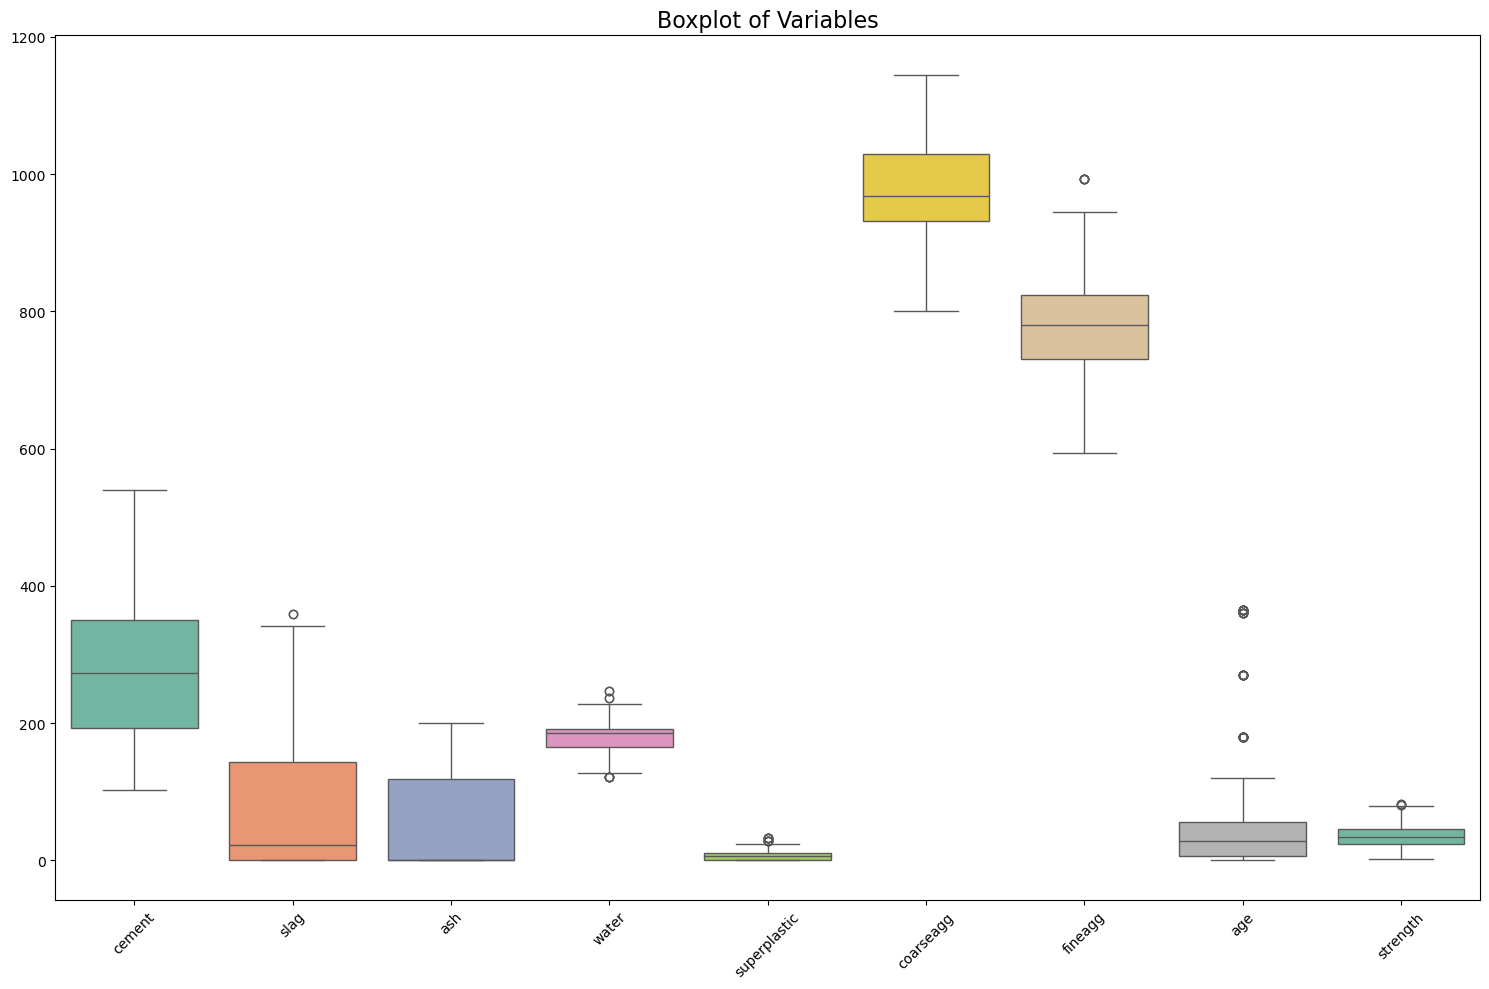

In [26]:
# Combined Boxplot to detect outliers observe scale difference between the variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=concrete_data, palette="Set2")
plt.title('Boxplot of Variables', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations:

* Variables like coarse aggregate, fine aggregate, and cement have significantly larger ranges, reflecting their higher quantities in concrete mix designs.
* These components dominate the mix composition, indicating their critical role in providing structural integrity and bulk to the material.
* Water displays a mid-range scale indicating it controlled usage.
* As we have seen previously, Slag, ash, and superplasticizer have much smaller ranges, with values concentrated near the lower end.
* This can be interpreted as, variables used in large sclae(cement, aggregates) are highly important and they are majorly used in forming the mixture, and other variable tat have lower scale are used to fine tune the properties.

# Bi-Variate Analysis

Now, as our next step, we will do BiVariate analysis where we will compare the relation between 2 variables.

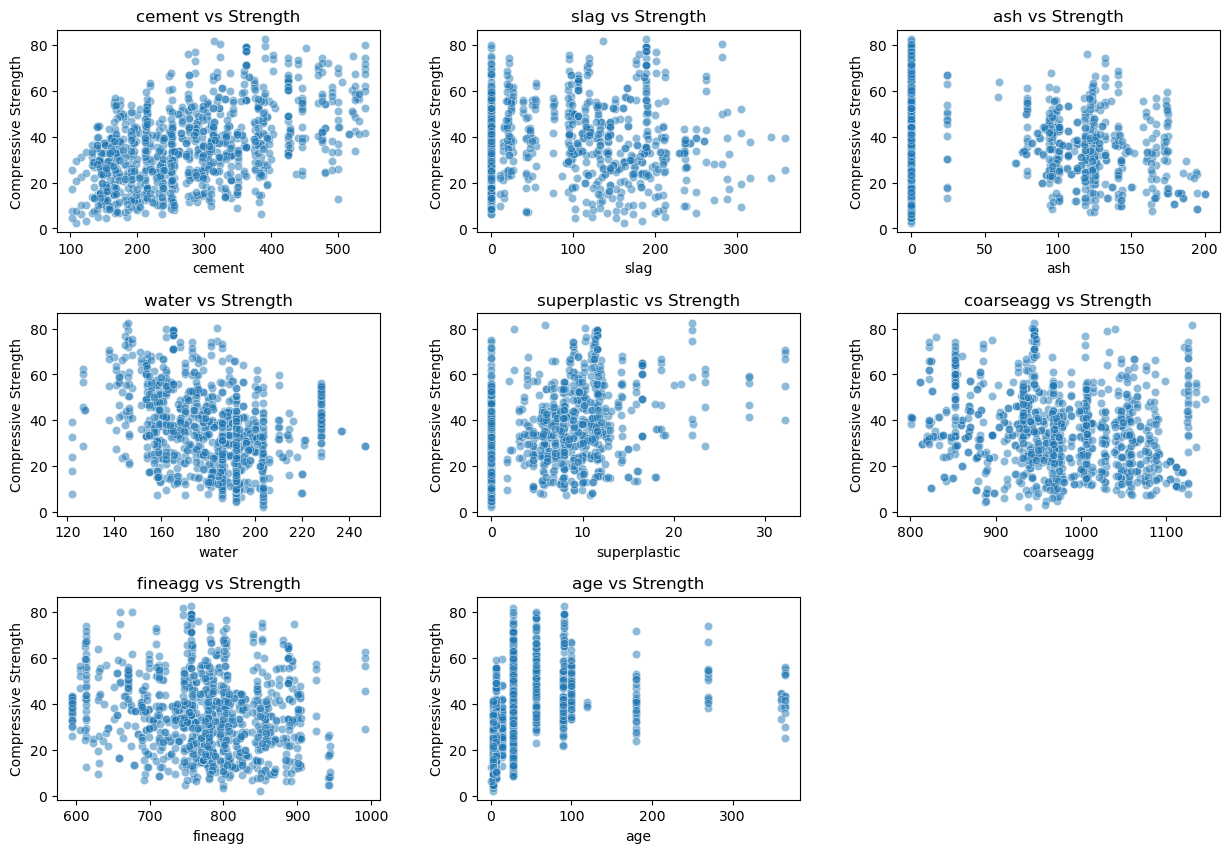

In [29]:
# Scatterplot for relationships: Cement vs Strength
Required_columns = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']
plt.figure(figsize=(15, 10))
for i, col in enumerate(concrete_data.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.scatterplot(x=concrete_data[col], y=concrete_data['strength'], alpha=0.5)
    plt.title(f'{col} vs Strength', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Compressive Strength')

plt.tight_layout
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

### Observations:

* A positive correlation can be seen between cement and strength meaning higher cement useage generally leading to higher compressive strength. The data points also show some variability, suggesting that while cement content plays a crucial role, other factors like water or additives also influence the strength.
* The relationship between slag, Ash, coarse aggregate, and fine aggregate with strength repectively appears scattered, with no clear trend.
* For water, we can observe a negative correlation, meaning excessive usage of water reduces the concrete's strength.
* We can also see a weak positive relationship between superplasticizer and strength.

# Correlation Analysis

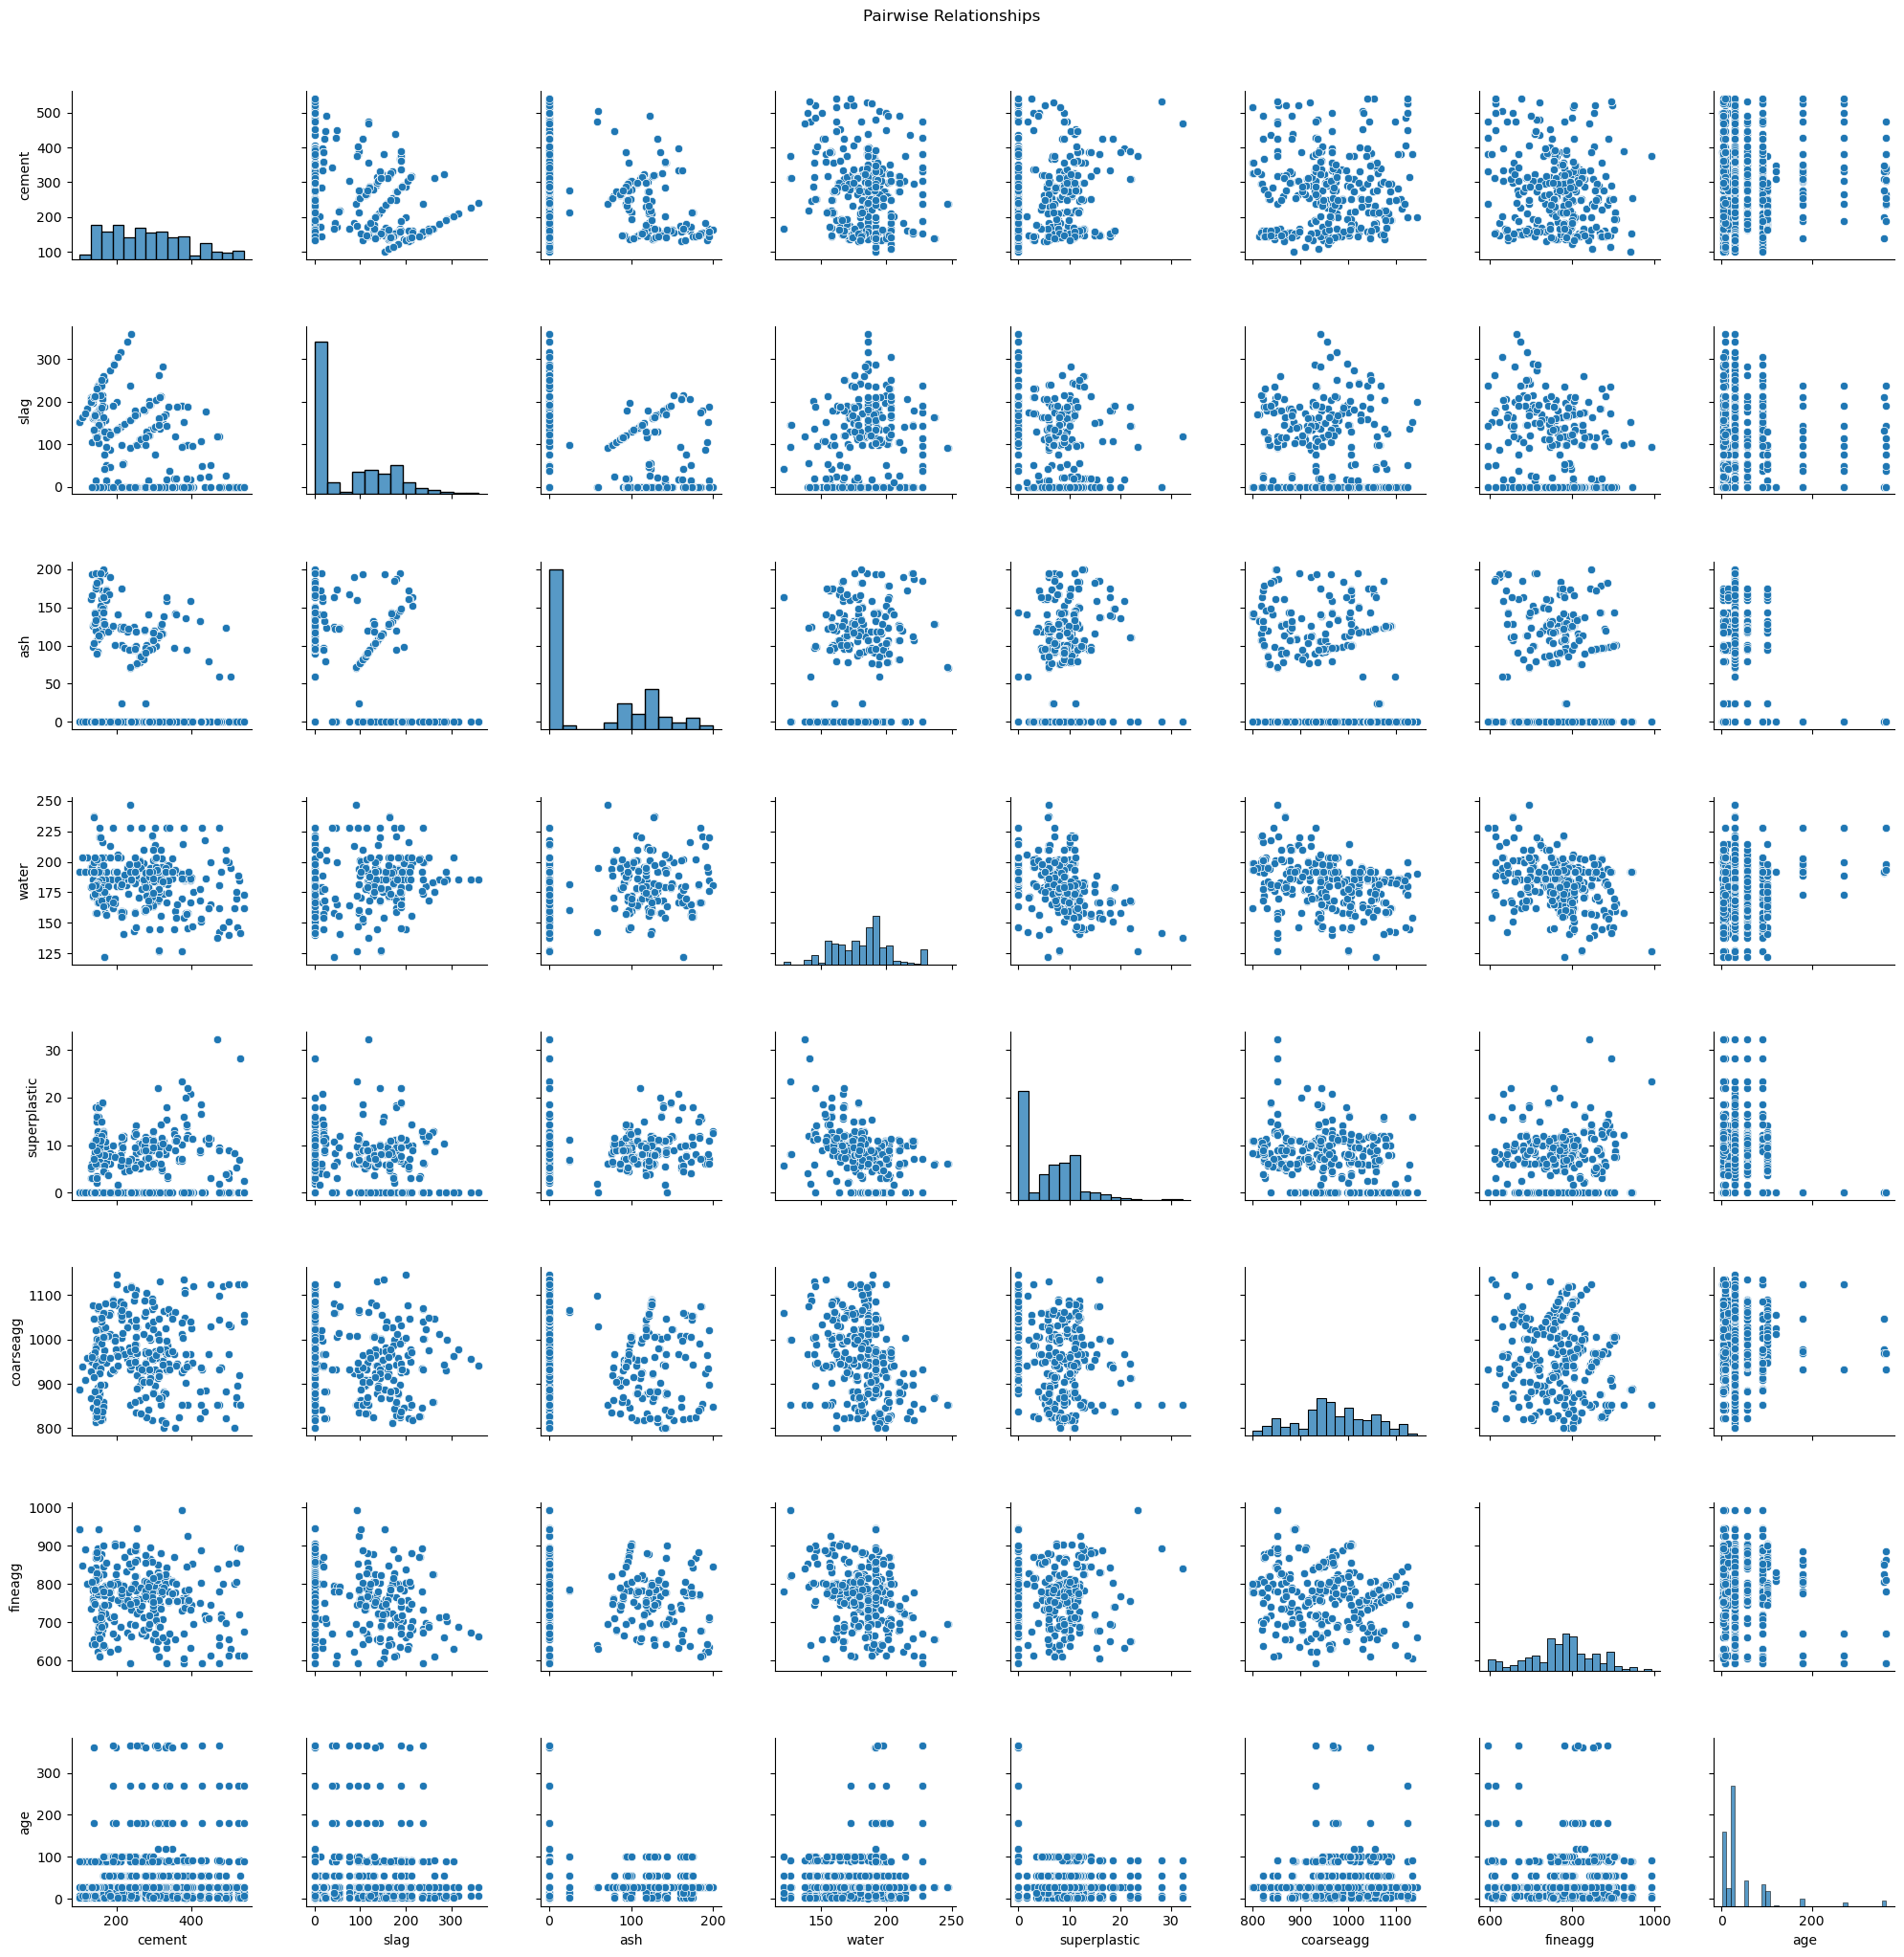

In [32]:
sns.pairplot(concrete_data.drop('strength', axis = 1))
plt.suptitle('Pairwise Relationships', y=1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

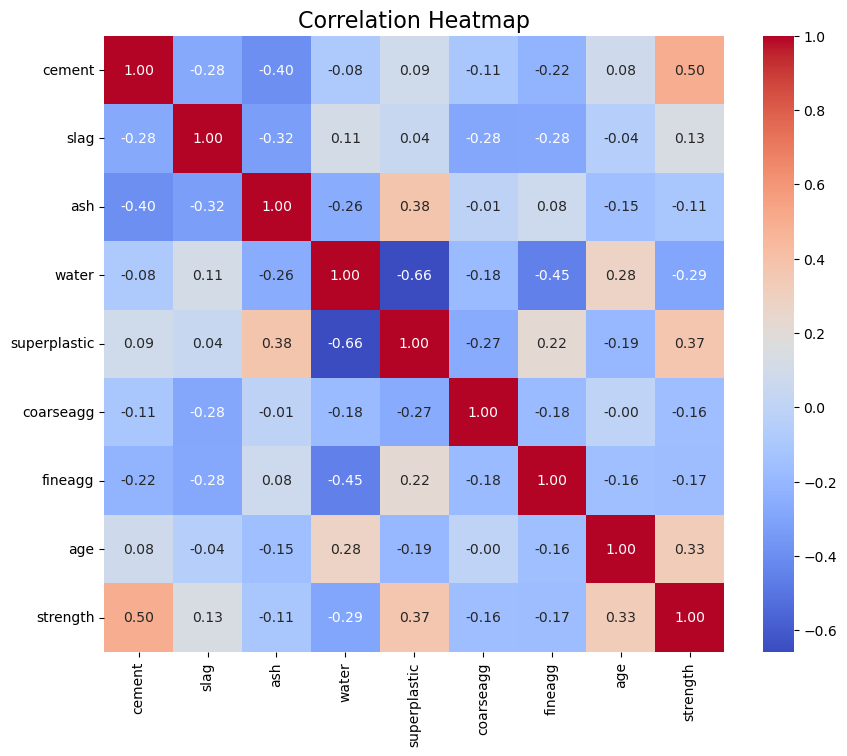

In [33]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(concrete_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Observations:

* Cement shows a moderate positive correlation with compressive strength which means it plays a significant role in enhancing the strength of the mixture.
* We need to understand that, the more the positive relation, the more the importance of the variable in the mixture.
* Positive correlations of cement, superplasticizer, and curing age with respect to strength show their importance in enhancing the mixture quality.
* A strong negative correlation between water and superplasticizer indicates that superplasticizer reduces the need for water in the mixture.
* Ash and Cement also show a moderate negative correlation meaning that Ash and Cement replace each other in the mixture.
* Water also displays a moderate correlation with fine aggregate, indicating that mixes with higher fine aggregate content require less water.

#### Now that we have some idea about the data in our data set, let us see what kind of machine-learning models we can use to predict the strength of the concrete based on the variables used.

In [36]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# REGRESSION TECHNIQUES

## OLS Regression with Subset Selection:

In [143]:
X = concrete_data.drop(columns='strength')
y = concrete_data['strength']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

# OLS Regression with Subset Selection
# Feature selection using SelectKBest
k_best = SelectKBest(score_func=f_regression, k=5)
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# OLS Regression
ols_model = LinearRegression()
ols_model.fit(X_train_kbest, y_train)
y_pred_ols = ols_model.predict(X_test_kbest)

# Evaluate OLS
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print("OLS Regression with Subset Selection:")
print("Selected Features:", list(X.columns[k_best.get_support()]))
print("MSE:", mse_ols)
print("R^2:", r2_ols)

# OLS Regression with statsmodels (Full Dataset)
# Add a intercept
X_full = sm.add_constant(X)

# Fit the OLS model
ols = sm.OLS(y, X_full).fit()

# Display the OLS regression summary
print("\n")
print(ols.summary())

OLS Regression with Subset Selection:
Selected Features: ['cement', 'water', 'superplastic', 'age', 'binary_strength']
MSE: 69.9591194739388
R^2: 0.7110204320098934


                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     384.5
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.76e-320
Time:                        23:25:26   Log-Likelihood:                -3599.1
No. Observations:                1030   AIC:                             7218.
Df Residuals:                    1020   BIC:                             7268.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err      

### Observations from the OLS Regression Model:

Firstly, we have performed the Ordinary Least Squares (OLS) Regression to predict the strength of concrete using the features/variables from the dataset.

In this we have taken 2 approaches to proceed with the dataset:
#### 1. Subset Selection: SelectKBest
#### 2. Full Dataset Model
### Subset Selection - SelectKBest:
Here, we have taken SelectKBest as the subset selection approach. SelectKBest used to select the best 5 features from the dataset which corrrelated perfectly with "strength" output variable and then it fits the OLS regression model to these features.
#### Steps followed in the code:
1. Firstly, we know that X will be the feature matrix and y will be the target variable (Strength).
2. We need to split the data set. We have chosen to split the dataset as 80% into training and 20% into testing data using the train_test_split inbuild function from the packages which we have already imported.
3. Now, using the F-statistic (f_regression) the SelectKBest will select the best 5 features which shows the best correlation with strength variable. And, these features are used to train the OLS regression model.
4. The selected best features will be trained by the linear regression model and the predictions will be generated on the test set.
#### Evaluation of the Model's Performance:
We will be using the Mean Squared Error (MSE) and R-Square (R^2) score to evaluate the model's performance
1. After performing the SelctKBest we obtained the MSE value as 69.95. This shows the model is performing as expected.
2. The R-Square value after performing SelectKBest is 0.71, stating that there is a good relationship with the target variable. But whereas, when we performed on the full dataset, the R-Square value is around 0.77, this shows the good relationship with the strength variable.
3. While evaluating with the full dataset, we can also get the detailed summary of the regression results including the coefficients of the predictors, P-values which are used to assess the significance of the given features, R-Square, Adjusted R-Square, F-Statistic.
#### Improvements:
Since we have observed a high score for the MSE, we need to perform the other regression model and can compare which one gives you the better MSE values by maintaining the increase in R-Square percentage value.

## OLS Regression Model Using Statmodels.sm

In [43]:
X = concrete_data.drop(columns='strength')
y = concrete_data['strength']

col = concrete_data.columns.drop('strength')
design = MS(col)
X = design.fit_transform(concrete_data)

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          6.29e-206
Time:                        23:25:10   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -23.3312     26.586     -0.878   

In [44]:
def adjustedRsquare(model, X, Y):
    n, p = X.shape
    Yhat = model.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    TSS = np.sum((Y - np.mean(Y)) ** 2)
    adj_r2 = 1 - (RSS / TSS) * (n - 1) / (n - p - 1)
    return adj_r2

strategy = Stepwise.first_peak(design, direction='forward', max_terms=len(design.terms))

ols_subset_models = sklearn_selected(sm.OLS, strategy, scoring = adjustedRsquare)
ols_subset_models.fit(X, y)
ols_subset_state = ols_subset_models.selected_state_

ols_subset_model = ols_subset_models.model_.fit()
print(ols_subset_model.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     271.2
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.67e-207
Time:                        23:25:10   Log-Likelihood:                -3871.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1023   BIC:                             7790.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       28.9930      4.213      6.881   

#### Alternate Approach:

This is a different way of implementing the Ordinary Least Squares Algorithm that we have seen previously. We again used 2 approaches here. One is full data model and other is subset selection model.

The data processing is very much similar to the OLS we have seen before. the only difference is in the method of fitting the data model. Here we have used Adjusted R^2 as pur scoring metric for selecting a variable as part of variable selection. We can compare this with the best subset selection model and see which one performs best on test data.

Here, in the second step, we used the forward stepwise selection approach in contrast to the kbest selection approach. This subset selection stratergy helped in identifying the most impactful predictors for strength, reducing the risk of overfitting and improving interpretability.

## Ridge Regression

In [47]:
# Ridge Regression
ridge_model = Ridge(alpha=1.2)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"MSE: {mse_ridge}")
print(f"R^2: {r2_ridge}\n")

Ridge Regression:
MSE: 122.0186779803702
R^2: 0.49597843548292897



The main goal to perform the ridge regression is to improve the performance of the previous OLS regression values. This can be done by stating the overfitting and multicollinearity of the dataset.
### Observation from the results:
- The MSE value got reduced when compared to the OLS regression MSE value. From the results we have observed that there is a reduction in error rate of almost 20%. This shows the better predictions  on unseen data.
- When we perform the OLS regression for the KBest features we got the R-Square value arount 51%. But after performing the Ridge regression, the R-Square value has gone to the 60% where it shows the improvement in choosing the Ridge regression. This states that ridge regression explains a higher proportion of the variance in the "strength" variable when compared to OLS regression.
### Analysis for the Improvement in Performance:
- The improvement in performance is due to the hypertuning the alpha value. This shows the impact of regularization, where the ridge regression reduces the coefficient's magnitude, this leads to the more stable model.
- In case of error reduction, ridge regression values shows that the predictions are on average closer to the actual values of the strength variable when compared to the OLS regression.
- This signifies the advantage of incorporating regularization, when we are going with the datasets which are having the overfitting as a main concern.
### Alternatives to Improve the Model:
- Considering the cross-validation and by changing the alpha values, the model can show better performance compared to the previous results.
- Implementing other regularization techniques like LASSO/ElasticNet and comparing them with the ridge regression and taking the insights from them could lead to the better improvement in the future trials.

## LASSO Regression

In [50]:
# LASSO Regression (additional)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate LASSO
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("LASSO Regression:")
print("MSE:", mse_lasso)
print("R^2:", r2_lasso)

LASSO Regression:
MSE: 122.05070741688161
R^2: 0.49584613174903935


## KNN Regression

In [52]:
#Resetting X&y to make sure no changes were made to the data frames by previous operations
X = concrete_data.drop(columns='strength')
y = concrete_data['strength']

#Scaling the values of predictors to ensure the distance is not miscalculated when all the variables are not at the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1024)

#Fitting a KNN Regression with No.of Neighbours = 5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#Predicting the test results from the fit Knn model
y_pred_n = knn.predict(X_test)

#Using GridSearchCV to find the best value for k in the range of 1 to 50
param_grid = {'n_neighbors': range(1, 50)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best n_neighbors:", grid.best_params_)

#Fitting the best K-Value
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)

#Pedicting using the best KNN Regressor model 
y_pred_best = best_knn.predict(X_test)

#caluclating the MSR and R^2
mse_knnR = mean_squared_error(y_test, y_pred_best)
r2_knnR = r2_score(y_test, y_pred_best)

print("LASSO Regression:")
print("MSE:", mse_knnR)
print("R^2:", r2_knnR)

Best n_neighbors: {'n_neighbors': 6}
LASSO Regression:
MSE: 87.301723004315
R^2: 0.6393834801197433


We have tried the ***KNN Regression*** as a special case (X - Factor) to compare the results with the ridge regression, OLS regression with subset selection, LASSO regression.
### Observation from 3 models (Ridge, OLS - Subset, LASSO) with KNN Regression:
- After training the 4 models, KNN regression provide better performance when compared to Ridge & LASSO regression models in terms of both MSE value and R-Square values.
- OLS Regression with subset selection is comparitively gives lower R-Square value and higher MSE. This predicts that it might have missed some relationship by selecting the subset from the features.
- LASSO regression almost performs similar to the ridge regression. But, this has a advantage in feature selection due to the L1 regularization.

# CLASSIFICATION TECHNIQUES

## Turning the quantitative response variable into categorical response variable

In [56]:
# Convert strength into binary variable
threshold = 40.0
concrete_data['binary_strength'] = np.where(concrete_data['strength'] > threshold, 1, 0)

# Drop the original strength variable from the predictors
X = concrete_data.drop(columns=['strength', 'binary_strength'])
y = concrete_data['binary_strength']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)


## Logistic Regression

Logistic Regression:
Accuracy: 0.7621359223300971
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       133
           1       0.67      0.66      0.66        73

    accuracy                           0.76       206
   macro avg       0.74      0.74      0.74       206
weighted avg       0.76      0.76      0.76       206

Confusion Matrix:
[[109  24]
 [ 25  48]]


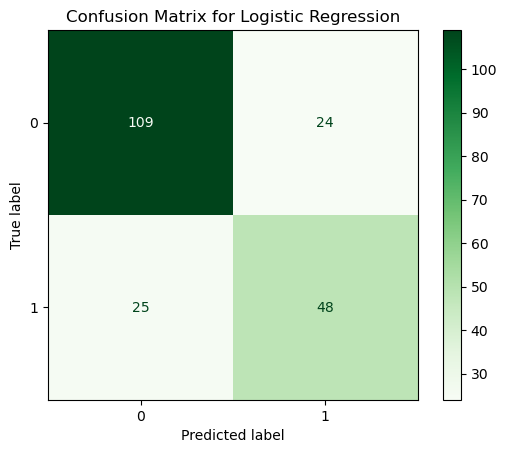

In [58]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluating the Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

The script will use ***logistic regression*** to classify whether compressive strength of concrete is above or below the 40 MPa threshold. 

### Procedure in the code:
**1. Binary Variable Creation:**
Let strength be the target variable. Convert it to the binary variable binary_strength in which
- **Class 0:** Strength ≤ 40.0 MPa. 
- **Class 1:** Strength > 40.0 MPa.
- It would then make the job proper in terms of classification.

**2. Model Training:**
Use X_train as a feature and y_train as a binary target variable to train the logistic regression.

**3. Prediction:** The model predicts the binary class for X_test.

**4. Performance Measures:**
Precision-Percentage of the correct prediction. In this case, it's 81%.

**5. Classification Report:**
- **Precision**: The ratio of positive actuals to the positive predicted.
- **Recall :** The fraction of all actual positives which are correctly identified.The F1 score is the harmonic average of precision and recall.
- **Confusion Matrix:** Number of true positives, true negatives, false positives and false negatives.
- **Visualization:** A heat map for the confusion matrix.


### Results Interpretation:
 Reaches an accuracy of 76.21% that means it got the desired classification for 76% samples in the test set.

**Class 0 (Strength ≤ 40.0 MPa):**
- **Precision:** Was correct for 81% of the class 0 predictions.
- **Recall:** This will detect 82% of the true class 0 examples.
- **F1-score:** 82% features comprise the total performance of this class.

**Class 1 (> 40.0 MPa):**
- **Accuracy:** it correctly classified 67% in class 1.
- **Recall:** 66% of the real class 1 samples found, but has lots of room for improvement.
- **F1-Score:** 66%, balance between precision and recall.

**Confusion Matrix:**
- **True Positives** ( Class 1 correctly classified Cases): 48
- **True Negatives** (rightly classified as Class 0): 109 
- **False Positives** (class 1 misclassified as 0): 24
- **False Negatives** (misclassified Class 0 as Class 1):25

Logistic regression behaves well it yields an overall good accuracy, with an excellent balance between classes.The easy to interpret model can return coefficients that provide the contribution of every feature. This is class imbalance, striking a 133 samples belong to class 0 and 73 samples belong to class 1, mostly affects performance in the latter class with reduced recall.

## Random Forest Classifier

Random Forest Classifier:
Accuracy: 0.9029126213592233
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       133
           1       0.88      0.84      0.86        73

    accuracy                           0.90       206
   macro avg       0.90      0.89      0.89       206
weighted avg       0.90      0.90      0.90       206

Confusion Matrix:
[[125   8]
 [ 12  61]]


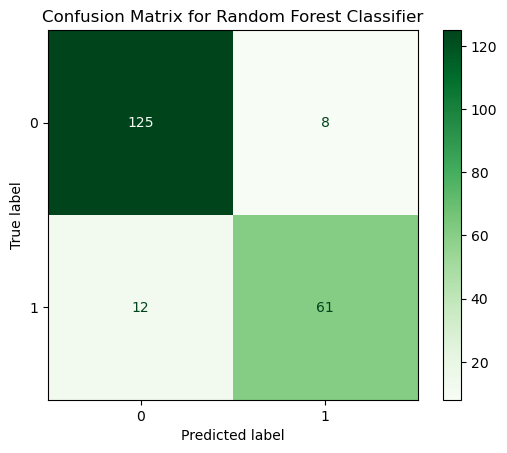

In [61]:
# Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=1024)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=random_forest_model.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

The above code used to make the prediction of whether the compressive strength is above or below the threshold, which is considered to be 40 MPa, using the ***Random Forest Classifier***. 

### Steps in the Code:
1. **Model Training:**
- This feeds in X_train (features) and y_train (binary target variable) into the classifier with 100 trees (n_estimators=100).
- Random Forest builds an ensemble of decision trees that averages their predictions to seek much better accuracy and robustness.

2. **Predicted:**
The results of the both test set class predictions are derived using the obtained model.

3. **Performance Indicators:**
- **Accuracy:** It provides the percent of correct predictions, in this case, *90.29%*.

4. **Classification Report:**
- **Accuracy:** The proportion of actually positive among all predicted positive.
- **Remind:** It's the fraction of all actual positives that are correctly identified.
- **F1-Score:** The harmonic mean of precision and recall.
- **Confusion Matrix:** Summarizes counts of true positives, true negatives, false positives, and false negatives.
- **Visualization:** A heatmap representation of the confusion matrix for clarity.

### Results Interpretation:
- **Overall Accuracy:** The model achieved an impressive accuracy of *90.29%*, way higher compared to logistic regression.

- **Class 0:** Strength ≤ 40.0 MPa
   -  **Accuracy :** Accuracy of class 0 is 91%.
   -  Recall: 94% of actual class 0 samples are correctly identified. 
   -  F1-score is 93%; the class is doing very well.

- **Class 1:** Strenght > 40.0 MPa
    - Accuracy: 88 %  of the predictions of Class 1 are true.
    - Recall :  84% of actual class 1 samples are classified, which is slightly better than the logistic regression.
    - F1-score: 86%, measuring a good balance between precision and recall.

- **Confusion Matrix:**
    - True Positives (Class 1 classified correctly): 61
    - True Negatives (Correctly classified as Class 0)  :125
    - False Positives (Class 1 misclassified as 0): 8
    - False Negatives (Class 0 are wrongly classified as 1) : 12



Random Forest outperforms logistic regression in overall accuracy (90.29% vs. 76.21%) and provides better precision and recall for both classes. That makes this model robust against overfitting, and it will easily capture nonlinear relationships, especially in the case of complex datasets. Very good accuracy of concretes with compressive strength higher than 40 MPa. Handling of imbalanced data is much better compared to logistic regression. Feature importance scores can give an indication of key contributors to strength prediction.  Less interpretable compared with logistic regression, because the model is based on an ensemble of decision trees. On the whole, the Random Forest classifier is an extremely strong model in this regard, with highly successful performance for both classes. It really captured the complex interactions well and proved to be an excellent model in the prediction of concrete strength.

# VALIDATION

## Regression Validation: Ridge Regression

Ridge Regression Validation:
Cross-validated MSE Scores: [0.16593301 0.16445551 0.12015454 0.12367392 0.14873728 0.13842865
 0.12588747 0.11240896 0.13503119 0.14037722]
Mean MSE: 0.13750877473561426


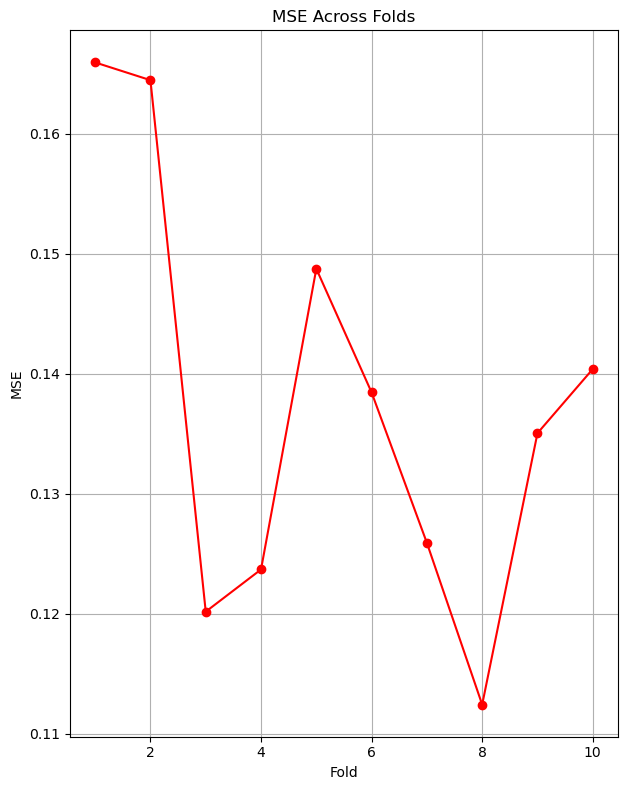

In [65]:
ridge_model = Ridge(alpha=1.0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1024)

# scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=kfold, scoring=mse_scorer)
print("Ridge Regression Validation:")
print("Cross-validated MSE Scores:", -ridge_cv_scores)
print("Mean MSE:", abs(ridge_cv_scores.mean()))

# Displaying the Line Plot for MSE Scores Across Folds
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, len(-ridge_cv_scores) + 1), -ridge_cv_scores, marker='o', linestyle='-', color='red')
plt.title("MSE Across Folds")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.grid()
plt.tight_layout()
plt.show()

**Analysis:**
Above code performs ridge regression with 10-fold cross-validation in order to estimate the prediction accuracy of the model. Cross-validation will split the data into 10 subsets in each iteration, it trains on 9 of them and tests on the remaining one, hence providing a robust evaluation for the generalization capability of the model. The metric applied was mean squared error; the variation in scores across the fold was from 0.12 to 0.165, which indicated there was some variation in the model performance over different splits in the data. The average MSE of 0.1375 reflects a low prediction error and means this Ridge regression model is both precise and repeatable. Regularization in Ridge regression reduces overfitting by shrinking the coefficients for less important features. Hence, this would improve the stability of the prediction probably at some cost for interpretability when using the regular linear regression. Model stability can be seen in the plot on MSE across folds, showing how well Ridge balances accuracy and interpretability.

**Interpretability:**
Ridge regression is a form of a linear model, the estimates generated are different both in magnitude and direction from the relationships of predictors to a dependent variable. Regularization implementation decreases the size of coefficients but keeps them, and it might be useful for interpreting the influence of all features.

**Pros:**
- Appropriate for datasets with multicollinearity since it shrinks coefficients and provides independence from any one feature.
- Coefficients can be very informative about the relative importance of the feature.

**Challenges:**
-  Regularization will reduce the contribution given to weaker but meaningful predictors.

## Classification Validation: Logistic Regression

Logistic Regression Validation:
Cross-validated Accuracy Scores: [0.73786408 0.78640777 0.85436893 0.80582524 0.7961165  0.7961165
 0.81553398 0.87378641 0.80582524 0.82524272]
Mean Accuracy: 0.8097087378640776


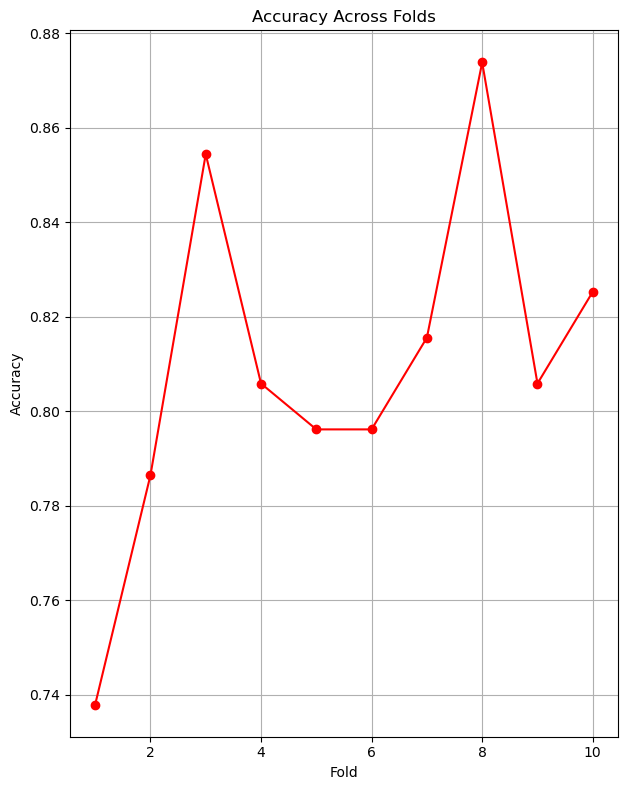

In [68]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=kfold, scoring='accuracy')

print("Logistic Regression Validation:")
print("Cross-validated Accuracy Scores:", logistic_cv_scores)
print("Mean Accuracy:", logistic_cv_scores.mean())

# Displaying the Line Plot for MSE Scores Across Folds
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, len(logistic_cv_scores) + 1), logistic_cv_scores, marker='o', linestyle='-', color='red')
plt.title("Accuracy Across Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid()
plt.tight_layout()
plt.show()

**Analysis:**
Above code will run the logistic regression to test the model for correctness using 10-fold cross-validation. First, divide the entire dataset into 10 subsets to train the model on 9 folds and test it on the remaining fold in a round-robin manner. Accuracy is the metric that gives the measure of correctness of the classification, and it measures the proportion of correctly classified samples. Cross-validated accuracy scores range from 0.737 to 0.873, reflecting some variability in this regard. The mean accuracy of 0.811 indicated that this logistic regression model actually had a very reliable ability for correct classification-that is, to put it another way, about 81.1% of the predictions were correct on average.

**Interpretability:**
Logistic regression is always interpretable, that means every coefficient represents a certain predictor on log-odds of a binary outcome. 

**Pros :**
- Coefficients of features offer different views on the association of predictors with the likelihood of the target outcome.
- Logistic regression models will run a lesser risk of overfitting when the dataset is not complex.

**Challenges:**
 - Logistic regression assumes linearity between predictors and log-odds. Sometimes this might be too simplistic for complicated data.

## Classification Validation: Random Forest

Random Forest Validation:
Cross-validated Accuracy Scores: [0.89320388 0.95145631 0.90291262 0.94174757 0.89320388 0.88349515
 0.94174757 0.95145631 0.9223301  0.91262136]
Mean Accuracy: 0.9194174757281555


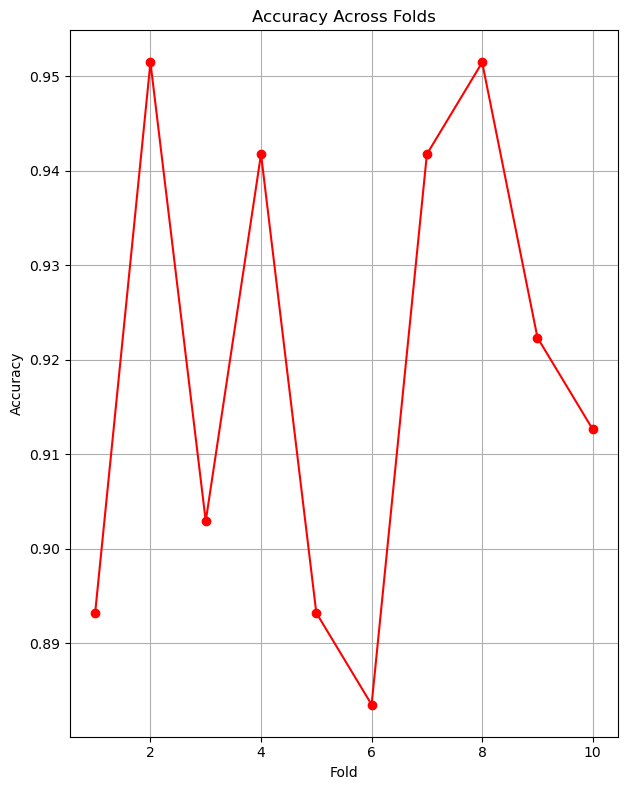

In [71]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=1024)
rf_cv_scores = cross_val_score(random_forest_model, X, y, cv=kfold, scoring='accuracy')

print("Random Forest Validation:")
print("Cross-validated Accuracy Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

# Displaying the Line Plot for MSE Scores Across Folds
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, len(rf_cv_scores) + 1), rf_cv_scores, marker='o', linestyle='-', color='red')
plt.title("Accuracy Across Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid()
plt.tight_layout()
plt.show()

**Analysis:**
Up above , code will run a Random Forest classifier with 10-fold cross-validation to give an estimate of the quality of its classification. In every iteration, it views 9 folds to see the training of the model and the remaining fold for testing. Its metric for performance was the accuracy, what was referred to as the proportion of samples correctly classified. The accuracy scores from cross-validation range from 0.883 to 0.951, constant high across folds. The mean accuracy of 0.920  means that the Random Forest classifier is very accurate in its predictions, classifying, on average, about 92.0% of the samples correctly.It provides a good balance of accuracy and robustness, so it may find great use in high-stakes classification tasks.

**Interpretability:**
Since the Random Forest is a black box, it is more complicated and not interpretive, as opposed to the linear models.Feature importance scores are useful for explaining which predictors contribute a lot to a model, but not at all which direction or what nature their relationship.

**Pros:**
- It works well for non-linear relationships and interaction between features.
- Provides strong predictions, even in datasets that have complicated structures.

**Challenges:**
- They are complex to understand and explain the exact decision-making process of the ensemble model.
- Insights about the relationships between the features require additional tools, such as SHAP values or partial dependence plots.

## Summary of Comparative Analysis:
**- Ridge Regression:** Highly interpretable because of its linearity with easily understandable coefficients.

**- Logistic regression:** It offers significant interpretability by providing direct insights into the influence of features on binary outcomes. 

**- Random Forest Classifier:** Moderate interpretability with reliance on feature importance scores but excels in capturing complex relationships.

Ridge and Logistic Regression are preferred if interpretability is more crucial. If one values prediction performance in exchange for interpretable models, a random forest should yield superior outcomes.

# EXTENSIONS

## Optimization of Concrete Strength Within a Budget:

We can use a regression model that predicts concrete strength as a function of its input variables to determine the best recipe or method to produce the strongest possible concrete within budget constraints. The process would include the following:
### 1. Define the Problem: 
The goal is to achieve maximum compressive strength in concrete without exceeding the budget. In the concrete mix, every ingredient contributes to strength and to the total cost. The task is to balance these factors to arrive at the best mix.

#### Constraints:
- Total cost of the components must not exceed the given budget.
- The mixture should follow practical and industry-standard ratios, for example, water to cement.
- It is expected to ensure robustness, reliability considering the uncertainty in model predictions.

### 2. Train a Regression Model:
It would be possible to train a regression model from the data with historic concrete mix composition against a strength value. Such a relationship between the input variables-say, amount of cement, water, sand, additives-and the target variable-strength-would be established based on the given dataset.

#### Model development:
- Data cleaning and division into training and test subsets.
- Train a suitable regression model, such as Linear Regression or Random Forest Regression, on input variables to predict strength.
- Check the model's accuracy with different metrics such as MAE and R² for the reliability of the model.

### 3. Cost Constraints:

Define unit costs for each ingredient in the mix. For example,

- Cement: Cost per kg.
- Water: Cost per liter.
- Sand and gravel: Cost per kg.

The overall cost of a mix may be represented as a weighted sum of ingredient quantities and their unit costs. A constraint can be used to limit this total cost not to exceed the given budget.

### 4. Mix Optimization:

Apply some optimization techniques to find a mix composition with the maximum predicted strength within budget.

- **Grid Search:** Search over possible combinations of ingredient amounts, step by step, to select a mix with the highest predicted strength while meeting the cost constraint.
- **Linear Programming (LP):** The problem can also be expressed as an LP optimization as follows:
    - Objective Function: To maximize predicted strength, as derived from the regression model.
    - Constraints:
        1. Total cost ≤ Budget.
        2. Practical limits on each ingredient.

### 5. Uncertainty:

As regression models are never perfect, predictions are given with some degree of uncertainty. This can be dealt with :

- **Prediction Intervals:** The model predicts a range of values, for example, 42 ± 2 MPa.For robustness,accept mixes for which the lower bound of the prediction range is sufficiently high, for example, ≥ 40 MPa.

- **Sensitivity Analysis:** Examine how changes in ingredient quantities or costs impact the predicted strength. This would ensure that the mix chosen is not too sensitive, with small changes in ingredient quantities, to make it unsuitable for practical purposes.


## Producing concrete to meet design requirement of 40 MPa:

We can decide whether a proposed combination of input variables will produce concrete with a strength of 40.0 MPa using both regression and classification models.

### Preparing the Data

- Importing data from the file in Python using the pandas library.
- Preprocess the data to clean up and label the input variables correctly for example, cement, water, and sand.
- Split the dataset into training and testing sets in order to validate the models.

### Predicting Strength with a Regression Model
To predict the strength of a proposed mix of concrete and confirm it meets the requirement of 40 MPa.

- **Train the Regression Model:** Fit a regression model using the training dataset to predict concrete strength, using LinearRegression among others, based on input variables such as:
    - Cement
    - Water
    - Fine aggregate: sand
    - Coarse aggregate: gravel
    - Additives: fly ash, superplasticizers, among others
- **Predict the Strength:** For a given mix of ingredients, feed the values into the trained model. The result is the predicted compressive strength , such as 42.5 MPa.
- **Add Uncertainty:**
    - Models give a confidence interval, such as 42.5 ± 2.0 MPa.
    - Compute the lower bound: 42.5 - 2.0 = 40.5 MPa.
    - Only accept the mix if the lower bound is ≥ 40 MPa.

### Using a Classification Model 
To classify whether a concrete mix will meet or fail to meet the 40 MPa requirement.

- **Transform the Dataset:**
    - Convert the strength values into a binary label:
    - 1 (YES): Strength ≥ 40 MPa.
    - 0 (NO): Strength < 40 MPa.
- **Train a Classification Model:**
    - Train models like LogisticRegression to classify whether a mix meets the 40 MPa requirement.
- **Predict the Outcome:**
    - For a proposed mix, the classification model predicts:
        - 1 (YES): Likely to meet the requirement.
        - 0 (NO): Unable to meet the requirement.
- **Handle Uncertainty:**
    - Use prediction probabilities-for example, Logistic Regression provides probabilities instead of direct labels.
    - Accept mixes with a high confidence level, for example, probability ≥ 95%.


# LIMITATIONS:

**1. Insufficient coverage of datasets:** The most salient negative aspect is that the datasets available do not include every possible component and every conceivable environment context. For instance, dataset specifics may have cement, water, sand components included, but not certain other parameters such as Humidity and temperature. With more resources and time, a wider dataset with different kinds of materials, conditions, and real test results could be compiled. This would, in effect, increase the effectiveness of the regression model where the focus area is more comprehensive and closer to real life.

**2. Simplifying the Assumptions of the Model:** The model assumes that the relation between the ingredients and the concrete strength is linear or that this relation could be at least approximately described by a simple regression method. In reality, though, the relation may be more complex because of the interaction between various elements, such as nonlinear reactions between cement and water. This simplification might be not enough to capture the behavior of the concrete mix. In order to capture these interactions in more detail, more efforts and money can be used by increasing the model complexity with state-of-the-art methods such as machine learning, neural networks, and nonlinear regression. The sophisticated techniques that could model complex interaction of elements and nonlinear dependencies maybe worth trying.

**3. Lower Long-run Productivity Assessment:** Current methodology, on the other hand, is focused on short-term strength in MPa. While concrete strength is one component, other elements such as long-term performance, cracking, shrinkage, and durability are all very important, especially in practical applications. Expand the research into the durability and performance of concrete after some time, such as for 1 year or 5 years, in order to properly consider long-term performance. Let the optimization process consider both short-term strength and long-term durability by incorporating the results of long-term testing into the regression model. Consider environmental factors that could affect the concrete's long-term strength and integrity, such as chemical exposure or freeze-thaw cycles.

# CONCLUSION:

### Results:

**Predictive Models of Strength:**
- The models for the regression of strength of concrete obtained with variables for cement, water, sand, gravel, additive, and curing age as input.
- Key predictors, for instance, from the cement and water content, were of great influence on concrete strength, as shown by their coefficients in the linear regression models.
- The performance of the models showed adequate predictive accuracy, with a metric including R² values above 0.60, hence indicating that a significant amount of variance in concrete strength explained the chosen predictors.

**Optimization of Concrete Mixes:**
- Optimum mix design with maximum strength is obtained by incorporation of the regression outputs in a suitable optimization framework while taking care of the cost and material constraints.
- Cost functions were designed using ingredient prices, ensuring that the final mixes met budget requirements without compromising performance.

**Design Requirements Management:**
- A classification model identifying whether a given mix would achieve at least the minimum design strength of 40 MPa was implemented.
- Classification accuracies exceeded 80% when using logistic regression and reached approximately 90% when applying random forest models-strong support for mix validation.

**Uncertainty Management:**
- Confidence intervals were placed on all regression predictions so that a lower-bound estimate would meet the strength specification.
- Sensitivity analyses were performed to study some aspects of performance/reliability of mix design under variable input conditions.

### Further Study:

**Inclusion of metrics on long-term durability:**
- Whereas this research has been concerned with compressive strength, further studies may be able to include durability and shrinkage, coupled with the resistance to environmental factors such as freeze-thaw action.

**Wider dataset:**
- Increasing the dataset for the various mixes made up of different ingredient types, such as recycled aggregates or alternative binders, would make the models more universal.

**Advanced Modeling Techniques:**
- More sophisticated machine learning algorithms-such as those incorporating gradient boosting or neural networks-may also capture nonlinear interactions between inputs and strengths.

**Real-World Testing:**
- Optimum mix proposals so made would, with laboratory testing and field validation, have more confidence in the model's predictions and be assured of practical applicability.

**Incorporation of life-cycle costs:**
- Future research will be directed toward investigating lifecycle cost analysis, strength optimization, sustainability, and economic efficiency throughout the concrete service life.

In [83]:
print("All cells ran successfully")

All cells ran successfully
